# Table of contents
- [01 Importing Moduls](#01-Importing-Moduls)

### 01 Importing Moduls

In [2]:
#!pip install yfinance 


In [1]:
import numpy as np
import pandas as pd 
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
nltk.download("vader_lexicon")
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/LouisaEbert/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

In [3]:
#getting historical data from the API regarding the last 200 days in a 1h intervall 
# in this case: Zoom
data=yf.download(tickers='ZM', period='200d', interval='1d')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,439.510010,478.000000,410.679993,457.690002,457.690002,53226200
2020-09-02,445.670013,445.670013,410.000000,423.559998,423.559998,18866800
2020-09-03,399.549988,409.899994,367.000000,381.320007,381.320007,20304300
2020-09-04,375.500000,386.010010,346.760010,369.890015,369.890015,13230100
2020-09-08,350.700012,365.500000,345.679993,350.880005,350.880005,7966500


In [4]:
data['datetime']=data.index
data.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume,datetime
0,2020-09-01,439.510010,478.000000,410.679993,457.690002,457.690002,53226200,2020-09-01
1,2020-09-02,445.670013,445.670013,410.000000,423.559998,423.559998,18866800,2020-09-02
2,2020-09-03,399.549988,409.899994,367.000000,381.320007,381.320007,20304300,2020-09-03
3,2020-09-04,375.500000,386.010010,346.760010,369.890015,369.890015,13230100,2020-09-04
4,2020-09-08,350.700012,365.500000,345.679993,350.880005,350.880005,7966500,2020-09-08
...,...,...,...,...,...,...,...,...
195,2021-06-11,347.640015,367.959991,345.100006,366.399994,366.399994,6767700,2021-06-11
196,2021-06-14,361.869995,369.576996,359.398987,365.910004,365.910004,3444300,2021-06-14
197,2021-06-15,364.500000,364.500000,357.048004,359.000000,359.000000,2587900,2021-06-15
198,2021-06-16,357.815002,366.829987,355.410004,361.829987,361.829987,2666900,2021-06-16


Text(0, 0.5, 'Zoom Opening Stock')

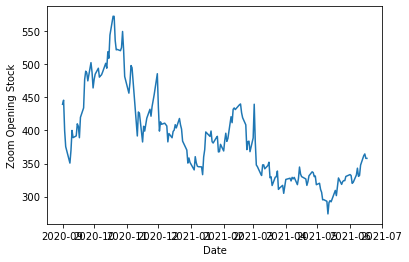

In [5]:
plt.plot(data.datetime,data.Open)
plt.xlabel("Date")
plt.ylabel("Zoom Opening Stock")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2020-09-01 to 2021-06-17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       200 non-null    float64       
 1   High       200 non-null    float64       
 2   Low        200 non-null    float64       
 3   Close      200 non-null    float64       
 4   Adj Close  200 non-null    float64       
 5   Volume     200 non-null    int64         
 6   datetime   200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.5 KB


In [7]:
#pip install finnhub-python

In [8]:
import finnhub

# Setup client
finnhub_client = finnhub.Client(api_key="c2si65iad3ic1qis06lg")

In [9]:
result=(finnhub_client.company_news('ZM', _from="2020-11-15", to="2021-06-03",))
type(result)

list

In [10]:
news=pd.DataFrame(result)
news.shape

(500, 9)

In [11]:
from datetime import datetime

In [12]:
news.tail()

,category,datetime,headline,id,image,related,source,summary,url
495,company,1614790225,Zoom down for more than a thousand users - Dow...,66216552,,ZM,Reuters,Zoom Video Communications Inc's video-conferen...,https://finnhub.io/api/news?id=060b48900b21b53...
496,company,1614781955,This Phenomenon Is Hitting the Nasdaq Hard Wed...,64512759,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,"The stock market has been volatile lately, and...",https://finnhub.io/api/news?id=69c118a1e49351a...
497,company,1614776390,2021 Will Be A Turnaround Year For 8x8,64429601,https://static.seekingalpha.com/uploads/2021/3...,ZM,SeekingAlpha,8x8 (EGHT) had good Q3'21 performance but free...,https://finnhub.io/api/news?id=9748f93c973e530...
498,company,1614770823,3 Stocks Ready to Bounce Back in March,64512760,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,"Some stocks that perhaps flew too high, too so...",https://finnhub.io/api/news?id=6e9e8cc0e7a4cf4...
499,company,1614766080,Direction Hard To Find As Market Keeps Choppin...,64439262,https://cdn.benzinga.com/files/imagecache/og_i...,ZM,Benzinga,Looking for direction this week? Consider buyi...,https://finnhub.io/api/news?id=f4a0d3ff8b3720c...


In [13]:
# turning the date into the right format 
for i in range(news.shape[0]):
    news.datetime[i]= datetime.utcfromtimestamp(news.datetime[i]).strftime('%Y-%m-%d')
    


<ipython-input-13-66bb358dc1fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news.datetime[i]= datetime.utcfromtimestamp(news.datetime[i]).strftime('%Y-%m-%d')
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [38]:
news.head()

,category,datetime,headline,id,image,related,source,summary,url
0,company,2021-06-03,Zoom Video Communications Inc. stock underperf...,68082828,https://images.mktw.net/im-220105/social,ZM,MarketWatch,Shares of Zoom Video Communications Inc. slid ...,https://finnhub.io/api/news?id=99695df4f1f7764...
1,company,2021-06-03,3 Great Reasons to Buy Zoom Stock,67990999,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,Zoom Video Communications (NASDAQ: ZM) was a m...,https://finnhub.io/api/news?id=41c2c026b38a613...
2,company,2021-06-03,Zoom Stock: Time to Buy the Dip?,67991000,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,It's safe to say that Zoom Video Communication...,https://finnhub.io/api/news?id=995d3d669a217b0...
3,company,2021-06-02,"Dow erases 265-point loss, turns positive led ...",67970221,https://image.cnbcfm.com/api/v1/image/10689125...,ZM,CNBC,The benchmark S&P 500 sits about 1% from its a...,https://finnhub.io/api/news?id=906585c4b1eaa41...
4,company,2021-06-02,One Undeniable Lesson of the Pandemic and Its ...,67991001,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,"InvestorPlace - Stock Market News, Stock Advic...",https://finnhub.io/api/news?id=62e71f1a2f6a099...


In [15]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  500 non-null    object
 1   datetime  500 non-null    object
 2   headline  500 non-null    object
 3   id        500 non-null    int64 
 4   image     500 non-null    object
 5   related   500 non-null    object
 6   source    500 non-null    object
 7   summary   500 non-null    object
 8   url       500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB


In [16]:
news['datetime']=news['datetime'].astype('datetime64[ns]')#datetime64
data['datetime']=data['datetime'].astype('datetime64[ns]')

In [17]:
df=news.merge(data,on='datetime',how="left")

In [18]:
df

,category,datetime,headline,id,image,related,source,summary,url,Open,High,Low,Close,Adj Close,Volume
0,company,2021-06-03,Zoom Video Communications Inc. stock underperf...,68082828,https://images.mktw.net/im-220105/social,ZM,MarketWatch,Shares of Zoom Video Communications Inc. slid ...,https://finnhub.io/api/news?id=99695df4f1f7764...,320.114014,325.829987,318.250000,319.010010,319.010010,3107300.0
1,company,2021-06-03,3 Great Reasons to Buy Zoom Stock,67990999,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,Zoom Video Communications (NASDAQ: ZM) was a m...,https://finnhub.io/api/news?id=41c2c026b38a613...,320.114014,325.829987,318.250000,319.010010,319.010010,3107300.0
2,company,2021-06-03,Zoom Stock: Time to Buy the Dip?,67991000,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,It's safe to say that Zoom Video Communication...,https://finnhub.io/api/news?id=995d3d669a217b0...,320.114014,325.829987,318.250000,319.010010,319.010010,3107300.0
3,company,2021-06-02,"Dow erases 265-point loss, turns positive led ...",67970221,https://image.cnbcfm.com/api/v1/image/10689125...,ZM,CNBC,The benchmark S&P 500 sits about 1% from its a...,https://finnhub.io/api/news?id=906585c4b1eaa41...,331.884003,333.790009,322.209991,327.109985,327.109985,6252100.0
4,company,2021-06-02,One Undeniable Lesson of the Pandemic and Its ...,67991001,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,"InvestorPlace - Stock Market News, Stock Advic...",https://finnhub.io/api/news?id=62e71f1a2f6a099...,331.884003,333.790009,322.209991,327.109985,327.109985,6252100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,company,2021-03-03,Zoom down for more than a thousand users - Dow...,66216552,,ZM,Reuters,Zoom Video Communications Inc's video-conferen...,https://finnhub.io/api/news?id=060b48900b21b53...,383.000000,383.250000,339.000000,341.570007,341.570007,15526000.0
496,company,2021-03-03,This Phenomenon Is Hitting the Nasdaq Hard Wed...,64512759,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,"The stock market has been volatile lately, and...",https://finnhub.io/api/news?id=69c118a1e49351a...,383.000000,383.250000,339.000000,341.570007,341.570007,15526000.0
497,company,2021-03-03,2021 Will Be A Turnaround Year For 8x8,64429601,https://static.seekingalpha.com/uploads/2021/3...,ZM,SeekingAlpha,8x8 (EGHT) had good Q3'21 performance but free...,https://finnhub.io/api/news?id=9748f93c973e530...,383.000000,383.250000,339.000000,341.570007,341.570007,15526000.0
498,company,2021-03-03,3 Stocks Ready to Bounce Back in March,64512760,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,"Some stocks that perhaps flew too high, too so...",https://finnhub.io/api/news?id=6e9e8cc0e7a4cf4...,383.000000,383.250000,339.000000,341.570007,341.570007,15526000.0


In [19]:
for i in range(df.shape[0]):
  df.summary[i] = strip_numeric(df.summary[i])
  df.summary[i] = strip_punctuation(df.summary[i])
  df.summary[i] = strip_multiple_whitespaces(df.summary[i])
  df.summary[i] = df.summary[i].lower()

<ipython-input-19-d7a1ef9e772f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.summary[i] = strip_numeric(df.summary[i])
<ipython-input-19-d7a1ef9e772f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.summary[i] = strip_punctuation(df.summary[i])
<ipython-input-19-d7a1ef9e772f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.summary[i] = strip_multiple_whitespaces(df.summary[i])
<ipython-input-19-d7a1ef9e772f>:5: SettingWi

In [20]:
for i in range(df.shape[0]):
  df.headline[i] = strip_numeric(df.headline[i])
  df.headline[i] = strip_punctuation(df.headline[i])
  df.headline[i] = strip_multiple_whitespaces(df.headline[i])
  df.headline[i] = df.headline[i].lower()

<ipython-input-20-28d392c13c83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.headline[i] = strip_numeric(df.headline[i])
<ipython-input-20-28d392c13c83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.headline[i] = strip_punctuation(df.headline[i])
<ipython-input-20-28d392c13c83>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.headline[i] = strip_multiple_whitespaces(df.headline[i])
<ipython-input-20-28d392c13c83>:5: Set

In [36]:
df.head()

,category,datetime,headline,id,image,related,source,summary,url,Open,High,Low,Close,Adj Close,Volume,sentiment_vd_headline,sentiment_vd_summary
0,company,2021-06-03,zoom video communications inc stock underperfo...,68082828,https://images.mktw.net/im-220105/social,ZM,MarketWatch,shares of zoom video communications inc slid t...,https://finnhub.io/api/news?id=99695df4f1f7764...,320.114014,325.829987,318.250000,319.010010,319.010010,3107300.0,0.0000,-0.4215
1,company,2021-06-03,great reasons to buy zoom stock,67990999,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,zoom video communications nasdaq zm was a mark...,https://finnhub.io/api/news?id=41c2c026b38a613...,320.114014,325.829987,318.250000,319.010010,319.010010,3107300.0,0.6249,0.0129
2,company,2021-06-03,zoom stock time to buy the dip,67991000,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,it s safe to say that zoom video communication...,https://finnhub.io/api/news?id=995d3d669a217b0...,320.114014,325.829987,318.250000,319.010010,319.010010,3107300.0,0.0000,0.6705
3,company,2021-06-02,dow erases point loss turns positive led by ec...,67970221,https://image.cnbcfm.com/api/v1/image/10689125...,ZM,CNBC,the benchmark s p sits about from its all time...,https://finnhub.io/api/news?id=906585c4b1eaa41...,331.884003,333.790009,322.209991,327.109985,327.109985,6252100.0,0.5106,0.1027
4,company,2021-06-02,one undeniable lesson of the pandemic and its ...,67991001,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,investorplace stock market news stock advice t...,https://finnhub.io/api/news?id=62e71f1a2f6a099...,331.884003,333.790009,322.209991,327.109985,327.109985,6252100.0,0.4215,0.0000


In [22]:
sid = sia()
df['sentiment_vd_headline'] = df['headline'].apply(lambda headline: sid.polarity_scores(headline)['compound'])
df['sentiment_vd_summary'] = df['summary'].apply(lambda summary: sid.polarity_scores(summary)['compound'])

In [23]:
df.tail()

,category,datetime,headline,id,image,related,source,summary,url,Open,High,Low,Close,Adj Close,Volume,sentiment_vd_headline,sentiment_vd_summary
495,company,2021-03-03,zoom down for more than a thousand users downd...,66216552,,ZM,Reuters,zoom video communications inc s video conferen...,https://finnhub.io/api/news?id=060b48900b21b53...,383.0,383.25,339.0,341.570007,341.570007,15526000.0,0.0000,0.0000
496,company,2021-03-03,this phenomenon is hitting the nasdaq hard wed...,64512759,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,the stock market has been volatile lately and ...,https://finnhub.io/api/news?id=69c118a1e49351a...,383.0,383.25,339.0,341.570007,341.570007,15526000.0,-0.1027,0.6527
497,company,2021-03-03,will be a turnaround year for x,64429601,https://static.seekingalpha.com/uploads/2021/3...,ZM,SeekingAlpha,x eght had good q performance but free cash fl...,https://finnhub.io/api/news?id=9748f93c973e530...,383.0,383.25,339.0,341.570007,341.570007,15526000.0,0.0000,0.8422
498,company,2021-03-03,stocks ready to bounce back in march,64512760,https://www.nasdaq.com/sites/acquia.prod/files...,ZM,Nasdaq,some stocks that perhaps flew too high too soo...,https://finnhub.io/api/news?id=6e9e8cc0e7a4cf4...,383.0,383.25,339.0,341.570007,341.570007,15526000.0,0.3612,0.6597
499,company,2021-03-03,direction hard to find as market keeps choppin...,64439262,https://cdn.benzinga.com/files/imagecache/og_i...,ZM,Benzinga,looking for direction this week consider buyin...,https://finnhub.io/api/news?id=f4a0d3ff8b3720c...,383.0,383.25,339.0,341.570007,341.570007,15526000.0,-0.1027,0.0000


In [24]:
df_plot=df[df.datetime > '2021-03-01']

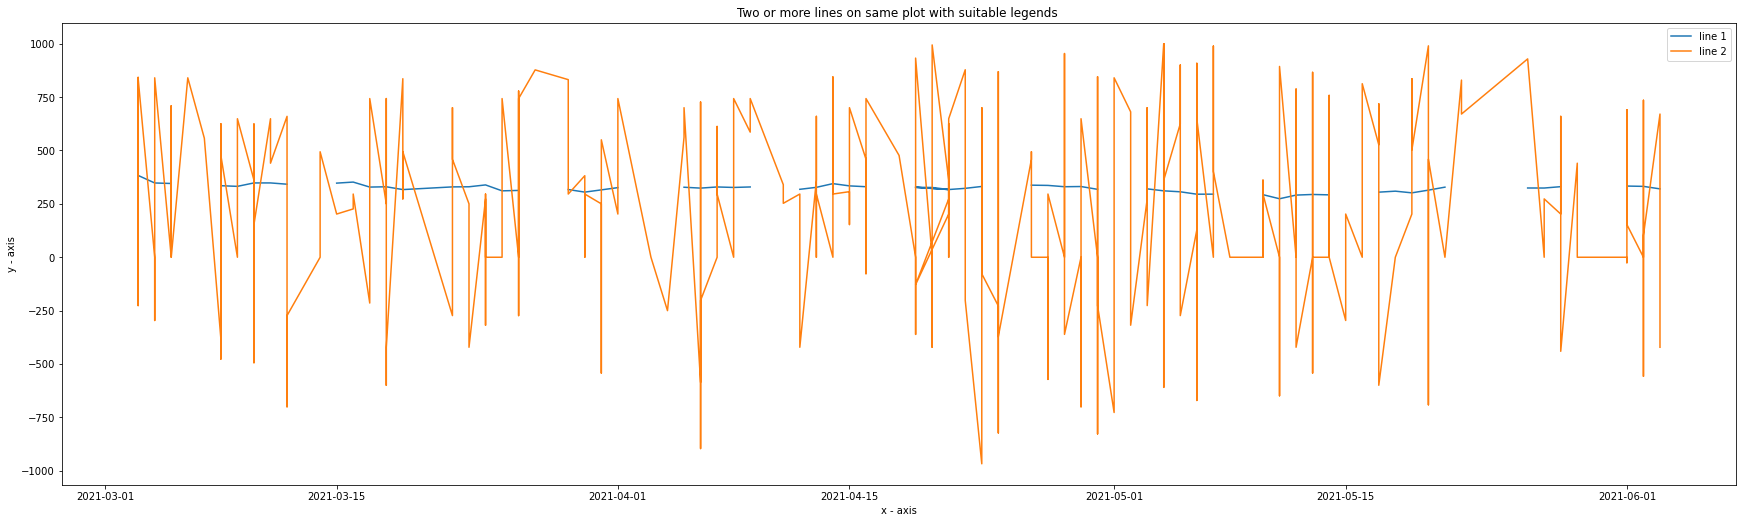

In [32]:
plt.figure(figsize=[30,8.5])
x1 = df_plot.datetime
y1 = df_plot.Open
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
# line 2 points
x2 = df_plot.datetime
y2 = df_plot.sentiment_vd_summary*1000
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")
#plt.yscale("log")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()